In [113]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import pandas as pd
import math
import numpy as np
from datetime import datetime
import os, sys

import seaborn as sns
import matplotlib.pyplot as plt

#import customized modules
src_dir = os.path.abspath(os.path.join(os.pardir, 'src'))
sys.path[0] = src_dir
from modules import *

In [115]:
# read all the business licensese in chicago
business_fname = '../data/Business_Licenses.csv'
df_business = pd.read_csv(business_fname)

/anaconda3/envs/cta/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
df_business.columns = df_business.columns.str.lower().str.replace(' ', '_')

In [117]:
# filter for license code 1006, which is code for Retail Food Establishment
df_retail_food = df_business[df_business.license_code == 1006]
# filter for business id: 
# 775 : Retail Sales of Perishable Foods
df_retail_food = df_retail_food.dropna(subset=['business_activity_id'])
df_perishable_coffee = df_retail_food[(df_retail_food.business_activity_id.str.contains('775'))]

In [118]:
# to find whether the business is active or not, transform the dates strings into time stamps for the license start date
df_perishable_coffee['license_term_start_date'] = df_perishable_coffee.license_term_start_date.apply(lambda x: str_to_date(x))

/anaconda3/envs/cta/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
# estimate which stores would be active right now, we will only use licenses active after 2016
df_pc_present = df_perishable_coffee[df_perishable_coffee.license_term_start_date > pd.Timestamp('2016-01-01')]
df_pc_present = df_pc_present.drop_duplicates(subset=['legal_name', 'address'])
# drop rows that don't have data on the zip code
df_pc_present = df_pc_present.dropna(subset=['zip_code'])
df_pc_present['zip_code'] = df_pc_present.zip_code.astype(int)

In [120]:
print(len(df_barplot))
df_barplot[df_barplot['index']==60601]

67


,index,zip_code
25,60601,152


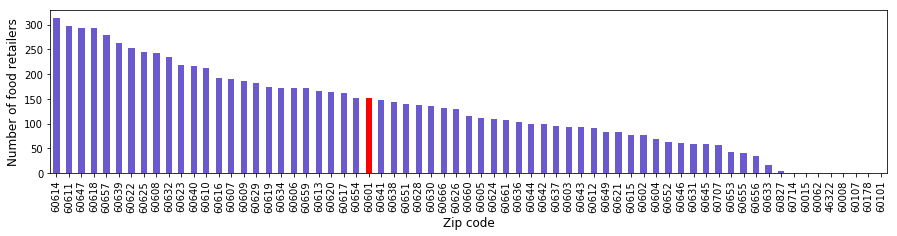

In [121]:
# count the number of food retail stores in each zipcodeß
fig, ax = plt.subplots(figsize=(15, 3))
df_barplot = pd.DataFrame(df_pc_present['zip_code'].value_counts()).reset_index()
colors = []
for i, row in df_barplot.iterrows():
    if row['index'] == 60601:
        colors.append('r')
    else:
        colors.append('slateblue')

df_barplot.plot(x='index', y='zip_code', ax=ax, kind='bar', color=colors,legend=False )

fontsize=12
ax.set_xlabel('Zip code', fontsize=fontsize)
ax.set_ylabel('Number of food retailers',fontsize=fontsize)
fig.savefig('../result/number_of_food_retailor.png', transparent=True,bbox_inches='tight')

In [ ]:
#end